Names:

Dauren Yedres

In [ ]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/health care diabetes.csv')
data=df
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
[np.shape(data[data['Outcome'] == 1]), np.shape(data[data['Outcome'] == 0])]

[(268, 9), (500, 9)]

In [ ]:
inputs= data.drop('Outcome', axis='columns')
target= data['Outcome']

In [ ]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
#inputs_2=inputs.loc[:, ['Pregnancies','Glucose','BloodPressure','Insulin','BMI', 'DiabetesPedigreeFunction']]

# KNN

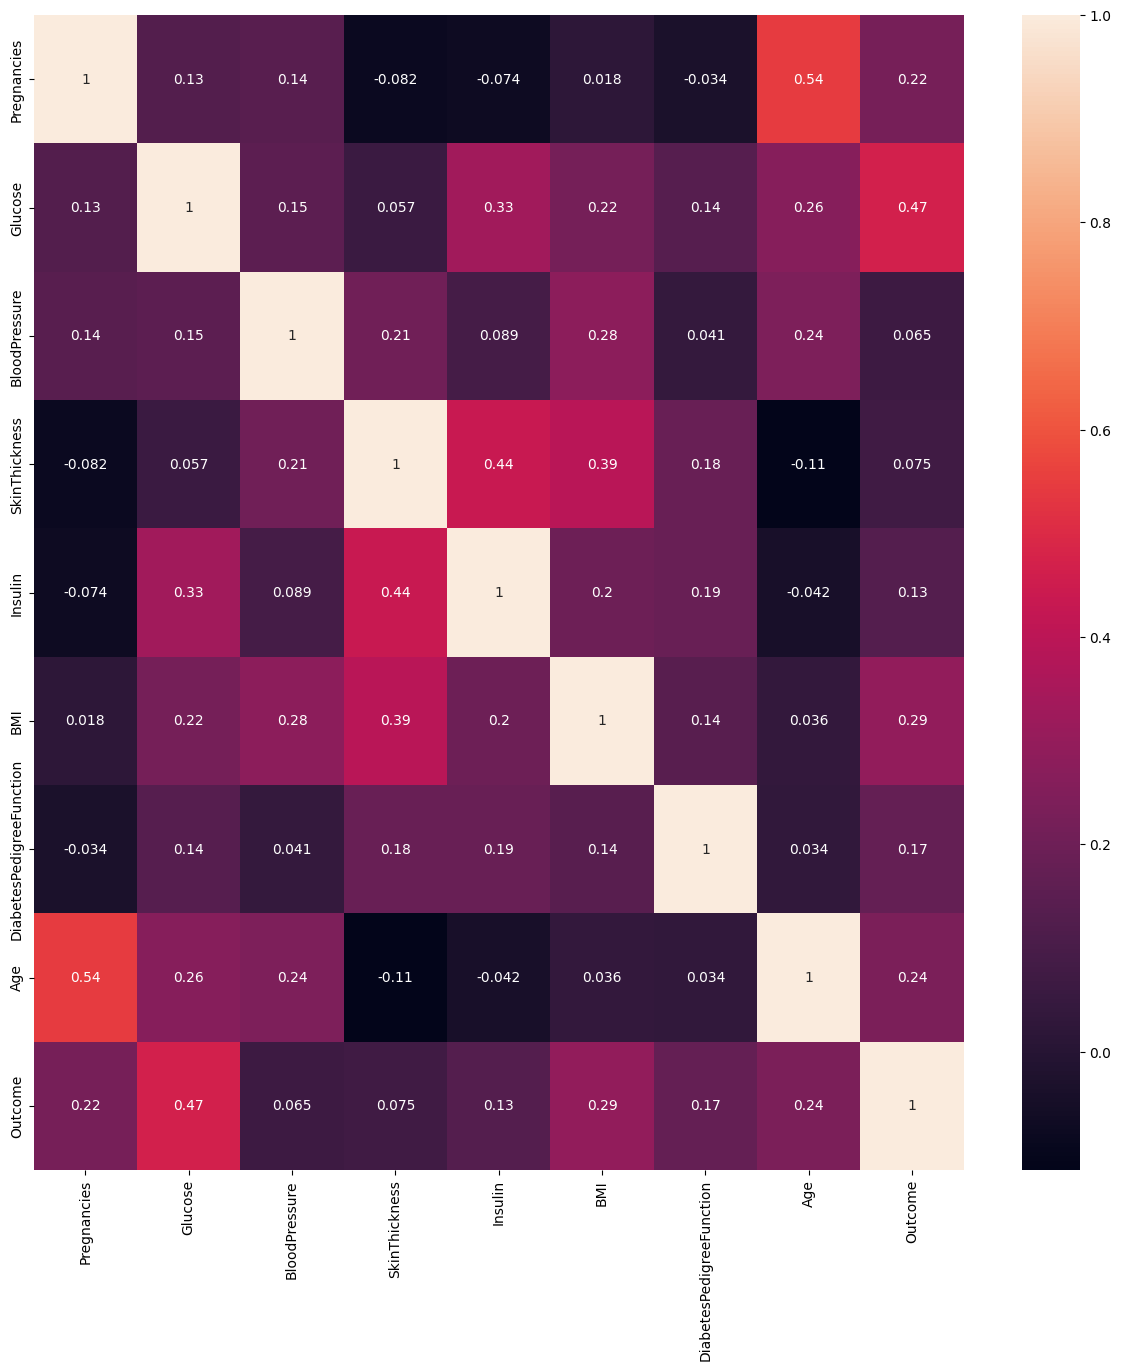

In [ ]:
plt.figure(figsize=(15,15))
sb.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # First step: creat model

x = inputs
y = target


In [ ]:
'''
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)  #1=> 50/50
x_overs, y_overs = ros.fit_resample(x, y)

ax =  y_overs.value_counts().plot.pie(autopct='%.2f')
_= ax.set_title('Over-sampling')
'''

"\nfrom imblearn.over_sampling import RandomOverSampler\n\nros = RandomOverSampler(sampling_strategy=1)  #1=> 50/50\nx_overs, y_overs = ros.fit_resample(x, y)\n\nax =  y_overs.value_counts().plot.pie(autopct='%.2f')\n_= ax.set_title('Over-sampling')\n"

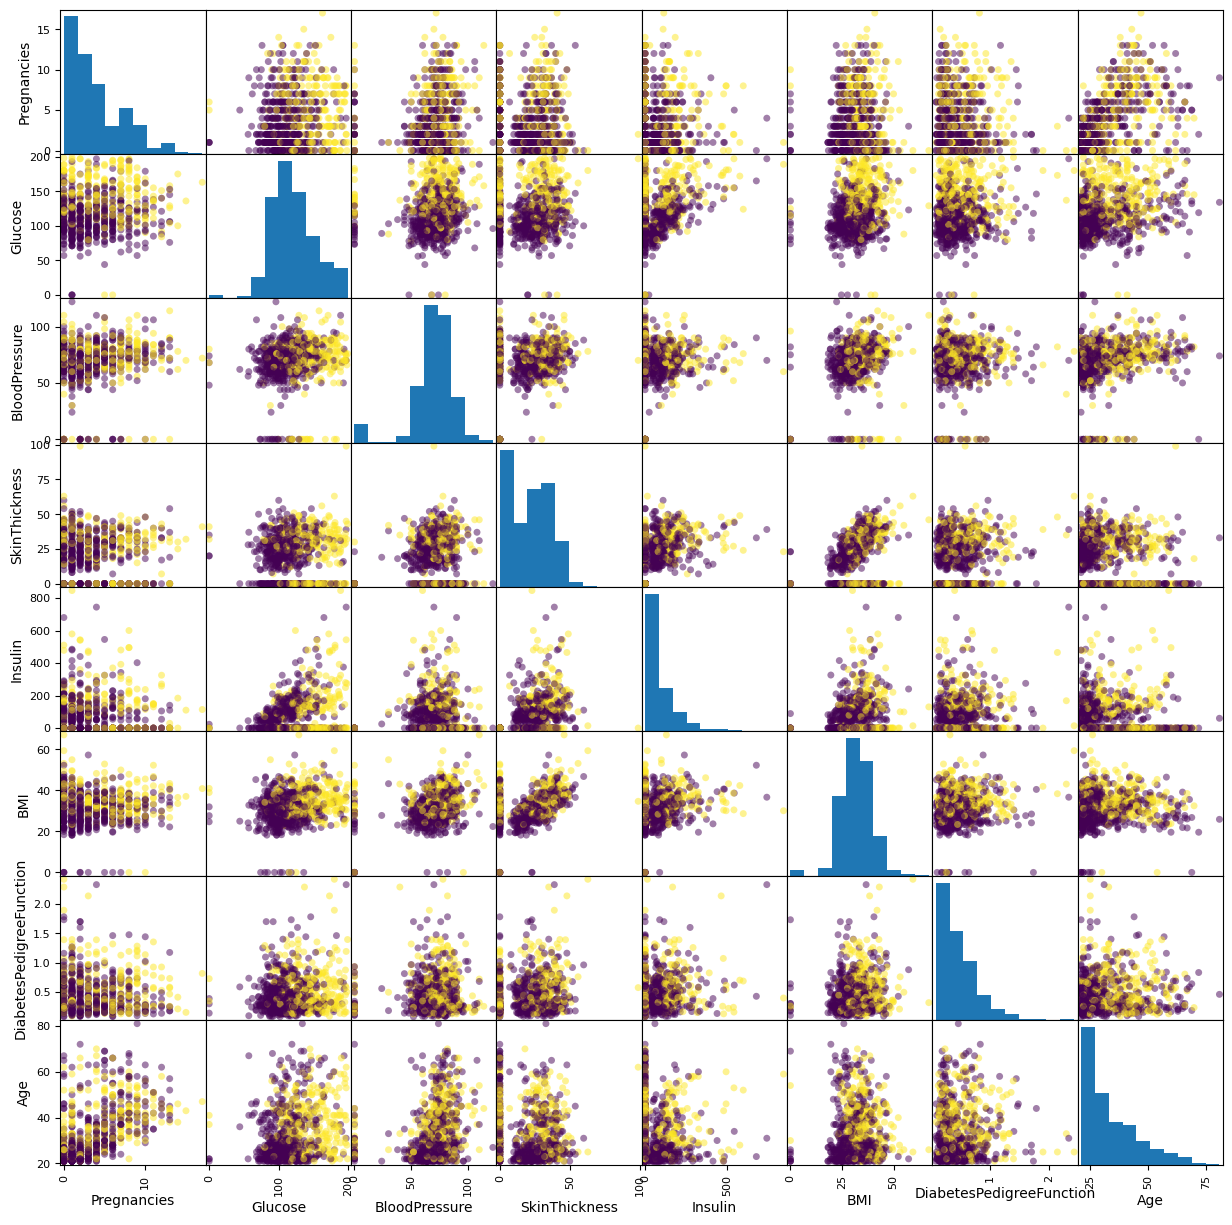

In [ ]:
# Visualization
pd.plotting.scatter_matrix(x, c = y, figsize=[15, 15], s=100)
plt.show()

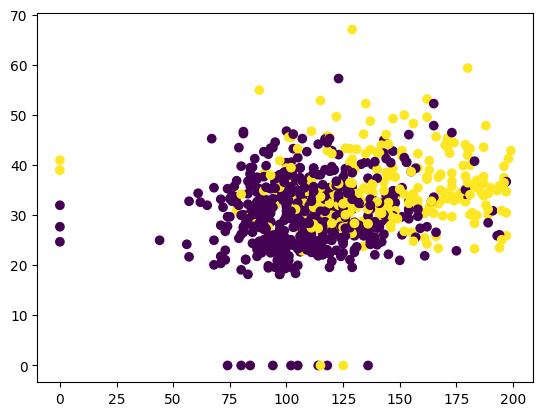

In [ ]:
x_temp = x.values[:, [1, 5]]
y_temp = y
plt.scatter(x_temp[:, 0], x_temp[:,1], c = y_temp)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y,random_state=42)

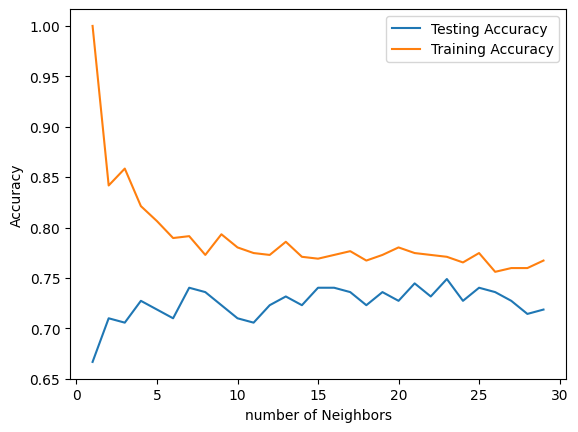

In [ ]:
neighbors = np.arange(1, 30)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train, y_train)
  train_accuracy[i] = knn_model.score(x_train, y_train)
  test_accuracy[i] = knn_model.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski',p=2)
knn = knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
knn.score(x_test, y_test)

0.7402597402597403